In [1]:
from study.show_tuning import perform_study_show_graphs

In [2]:
from optuna.integration import SkoptSampler
from optuna.samplers import CmaEsSampler, QMCSampler, RandomSampler, TPESampler

In [3]:
hyperparameter_set = {
    "segment_size": 75,
    "batch_size": lambda trial: trial.suggest_int("batch_size", 25, 50),
    "n_shifts": 5,
    "optimizer": lambda trial: trial.suggest_categorical(
        "optimizer", ["adam", "sgd", "rmsprop", "adamax", "nadam"]
    ),
    "l_rate": lambda trial: trial.suggest_float("l_rate", 1e-4, 1e-2, log=True),
    "n_conv_layers": lambda trial: trial.suggest_int("n_conv_layers", 0, 3),
    "conv_filters": lambda trial, i: trial.suggest_int(f"conv_filters_{i}", 16, 128),
    "recurrent_type": lambda trial: trial.suggest_categorical(
        "recurrent_type", ["GRU", "LSTM"]
    ),
    "n_recurrent_layers": lambda trial: trial.suggest_int("n_recurrent_layers", 1, 3),
    "recurrent_units": lambda trial, i: trial.suggest_int(
        f"recurrent_units_{i}", 32, 256
    ),
    "n_dense_layers": lambda trial: trial.suggest_int("n_dense_layers", 0, 2),
    "dense_units": lambda trial, i: trial.suggest_int(f"dense_units_{i}", 64, 128),
    "dropout_rate": lambda trial: trial.suggest_float("dropout_rate", 0.1, 0.5),
    "use_batch_norm": lambda trial: trial.suggest_categorical(
        "use_batch_norm", [True, False]
    ),
    "pooling_type": lambda trial: trial.suggest_categorical(
        "pooling_type", ["max", "average"]
    ),
    "pool_after_each": lambda trial: trial.suggest_categorical(
        "pool_after_each", [True, False]
    ),
}

[I 2024-08-12 14:19:35,394] A new study created in memory with name: no-name-9748945c-e470-438c-a2ef-507343b86b4b
[I 2024-08-12 14:22:50,941] Trial 0 finished with value: 0.9196982979774475 and parameters: {'batch_size': 49, 'optimizer': 'nadam', 'l_rate': 0.0006593020244824092, 'recurrent_type': 'LSTM', 'n_recurrent_layers': 1, 'recurrent_units_0': 43, 'n_dense_layers': 0, 'dropout_rate': 0.18108525945630702, 'n_conv_layers': 0, 'use_batch_norm': True, 'pooling_type': 'max', 'pool_after_each': False}. Best is trial 0 with value: 0.9196982979774475.
[I 2024-08-12 14:24:30,872] Trial 1 finished with value: 0.5 and parameters: {'batch_size': 35, 'optimizer': 'nadam', 'l_rate': 0.009687142781434333, 'recurrent_type': 'GRU', 'n_recurrent_layers': 3, 'recurrent_units_0': 195, 'recurrent_units_1': 196, 'recurrent_units_2': 235, 'n_dense_layers': 0, 'dropout_rate': 0.3173940066104837, 'n_conv_layers': 0, 'use_batch_norm': False, 'pooling_type': 'average', 'pool_after_each': False}. Best is tr

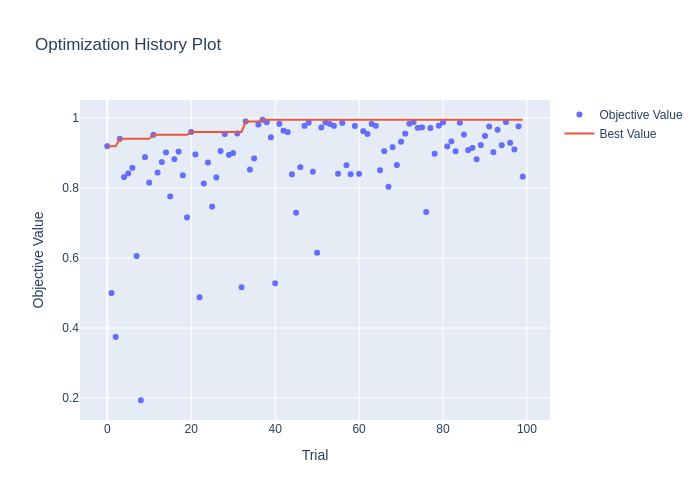

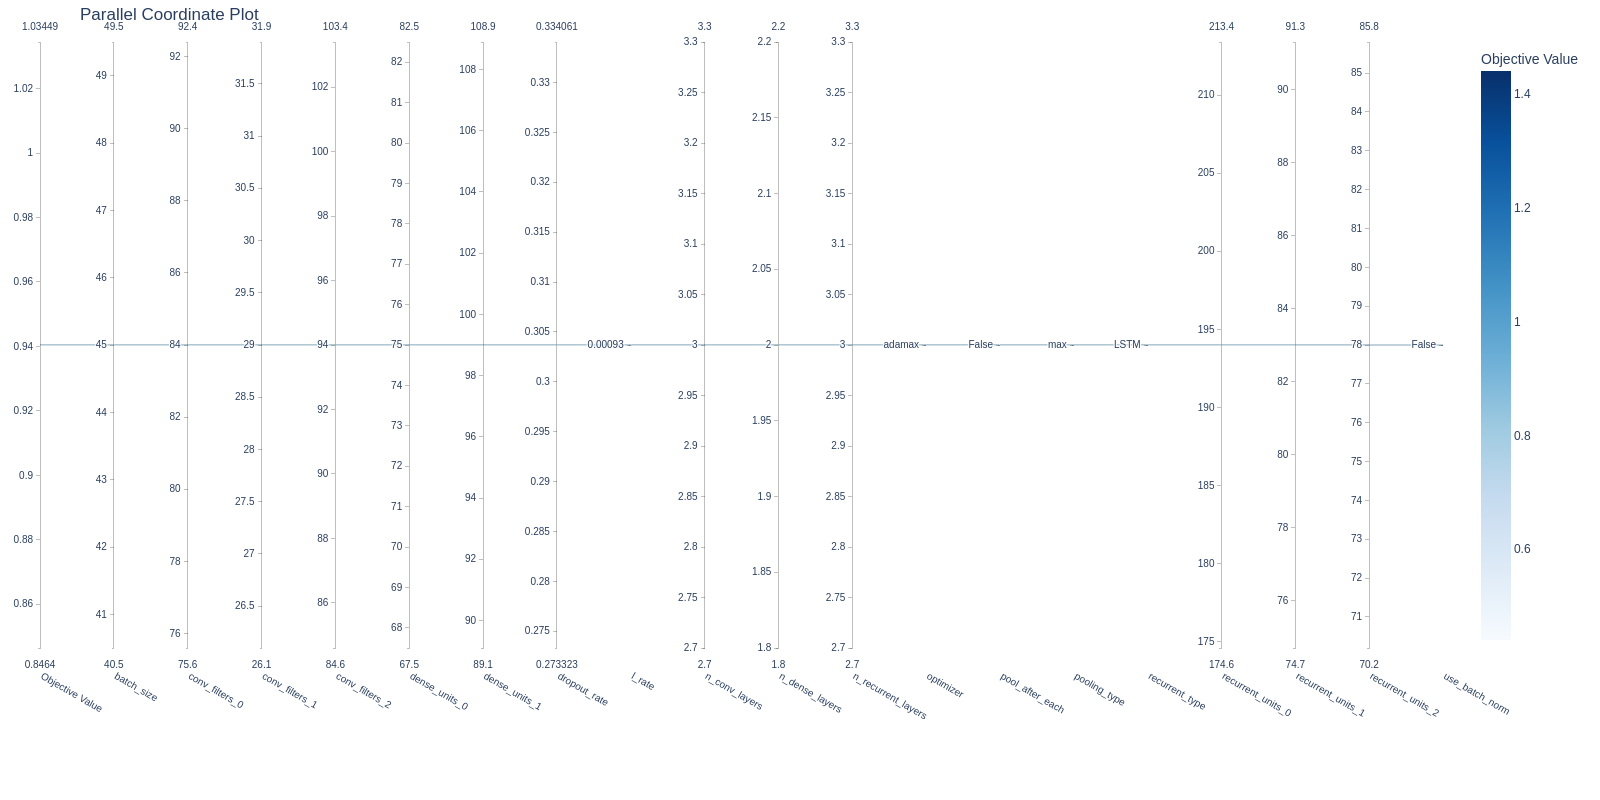

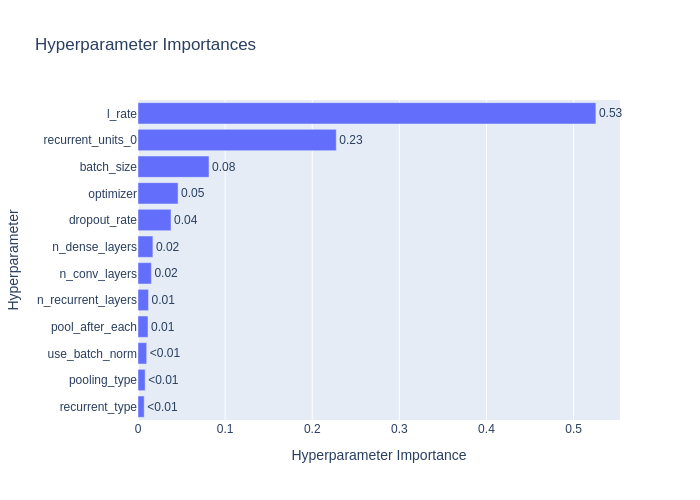

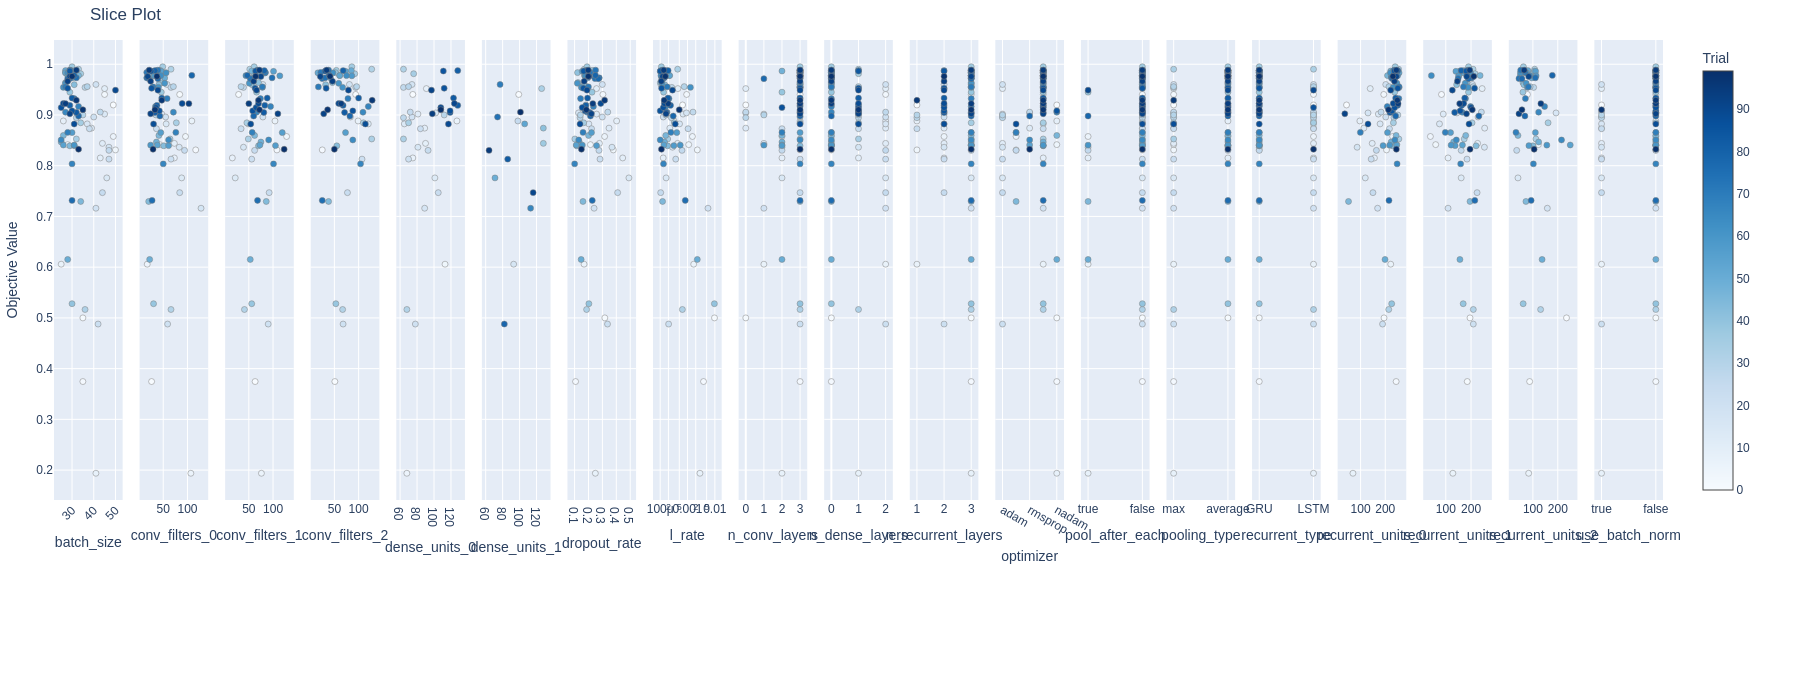

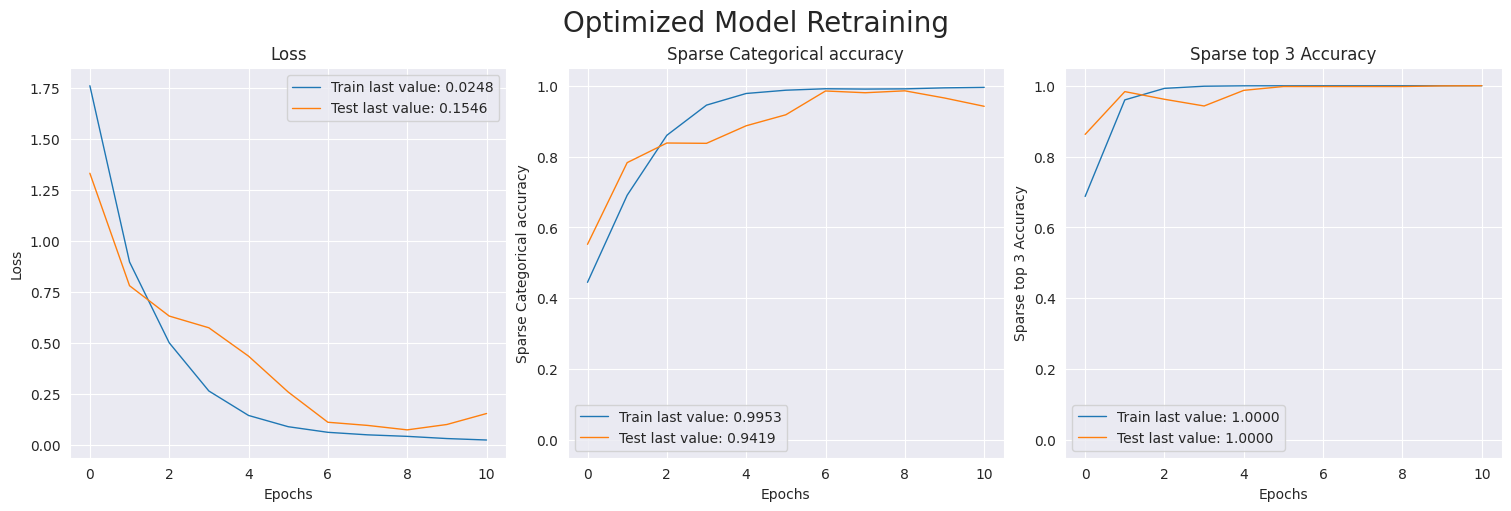

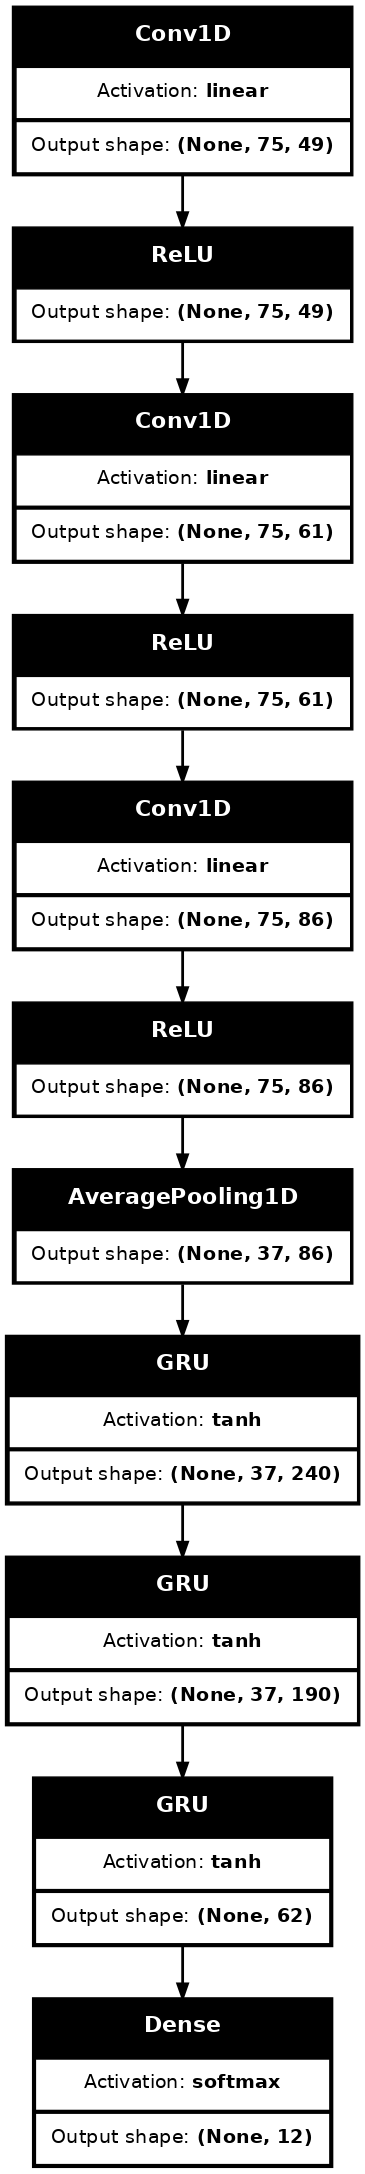

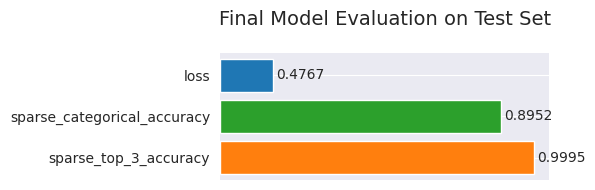

<ActivityRecognitionModel name=activity_recognition_model_100, built=True>

In [4]:
perform_study_show_graphs(
    hyperparameter_set=hyperparameter_set, n_trials=100, epochs=20, sampler=TPESampler()
)

[I 2024-08-12 21:39:37,547] A new study created in memory with name: no-name-5ac9791d-e13a-4214-840c-f25974e5aed0
[I 2024-08-12 21:43:05,989] Trial 0 finished with value: 0.16179774701595306 and parameters: {'batch_size': 25, 'optimizer': 'nadam', 'l_rate': 0.00847522530537061, 'recurrent_type': 'LSTM', 'n_recurrent_layers': 3, 'recurrent_units_0': 60, 'recurrent_units_1': 86, 'recurrent_units_2': 42, 'n_dense_layers': 0, 'dropout_rate': 0.4590648171280215, 'n_conv_layers': 1, 'conv_filters_0': 105, 'use_batch_norm': True, 'pooling_type': 'max', 'pool_after_each': False}. Best is trial 0 with value: 0.16179774701595306.
[I 2024-08-12 21:44:22,849] Trial 1 finished with value: 0.7977678775787354 and parameters: {'batch_size': 28, 'optimizer': 'adamax', 'l_rate': 0.0009405455164517645, 'recurrent_type': 'GRU', 'n_recurrent_layers': 2, 'recurrent_units_0': 210, 'recurrent_units_1': 256, 'n_dense_layers': 0, 'dropout_rate': 0.13362718961998402, 'n_conv_layers': 1, 'conv_filters_0': 19, 'us

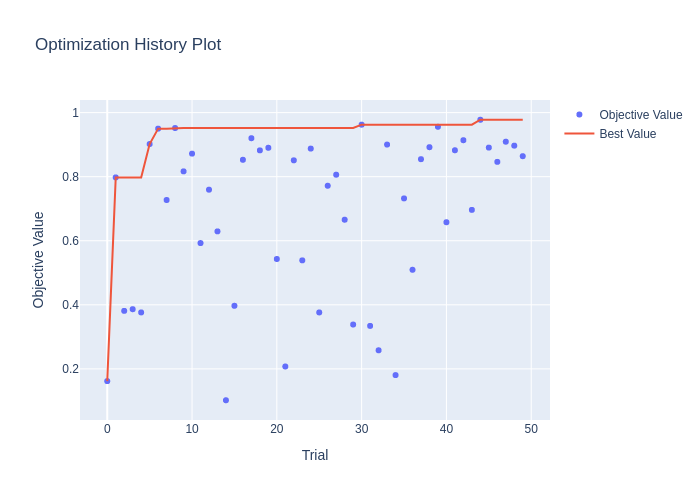

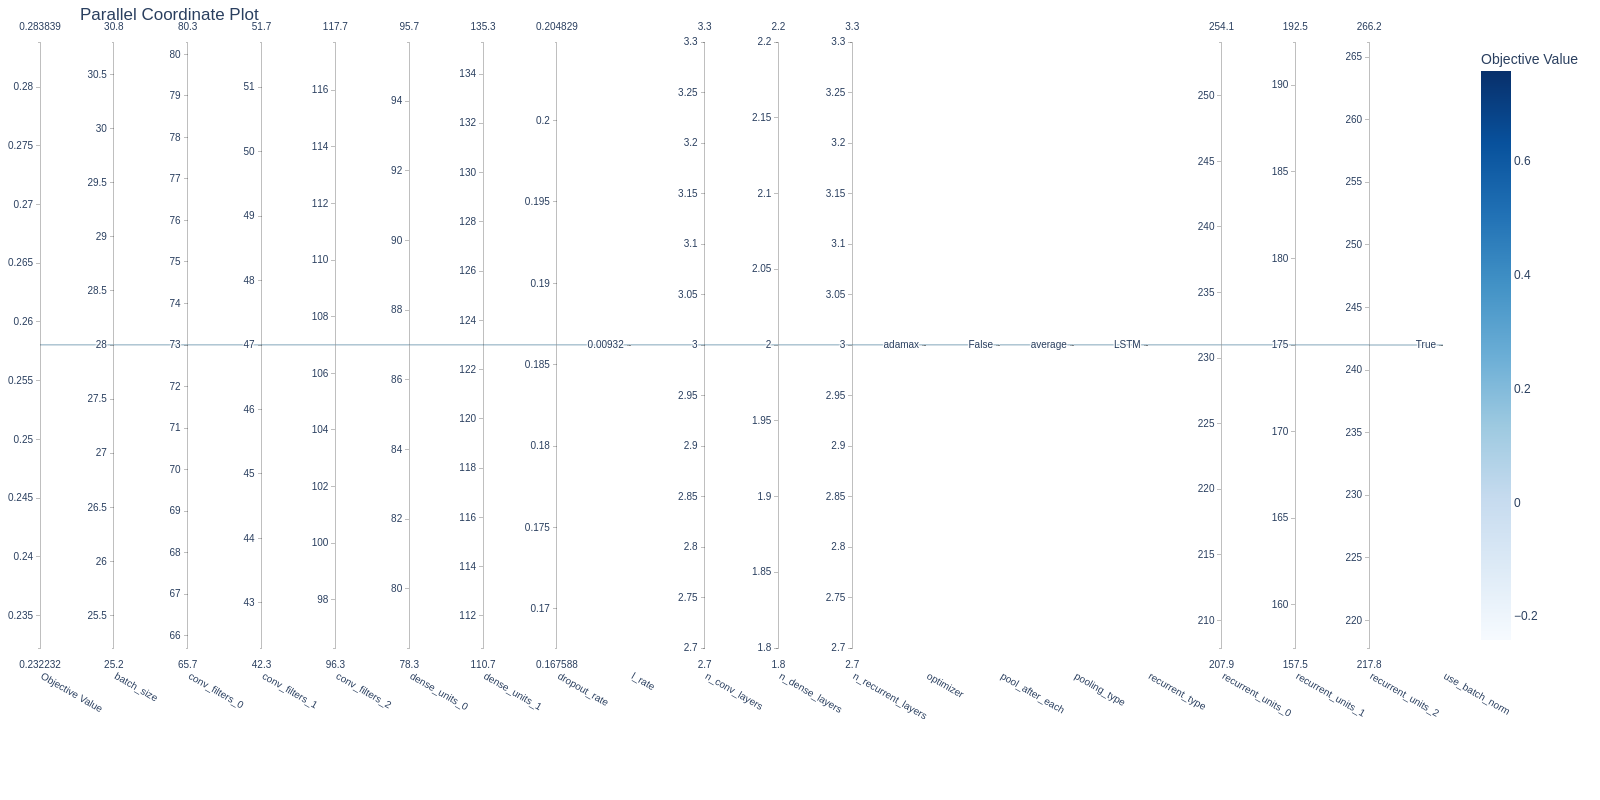

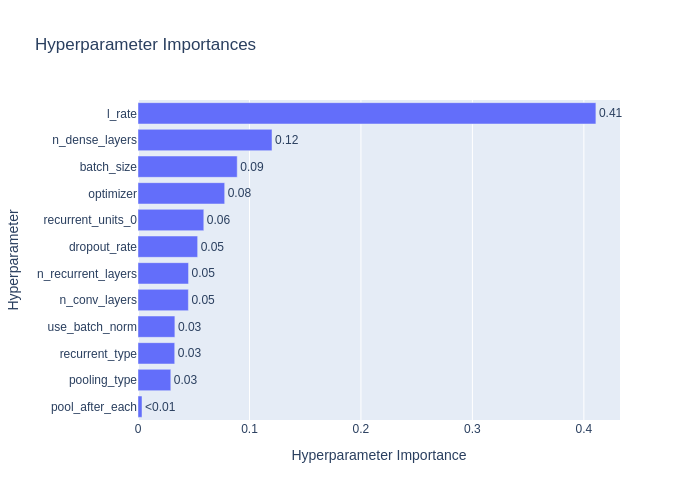

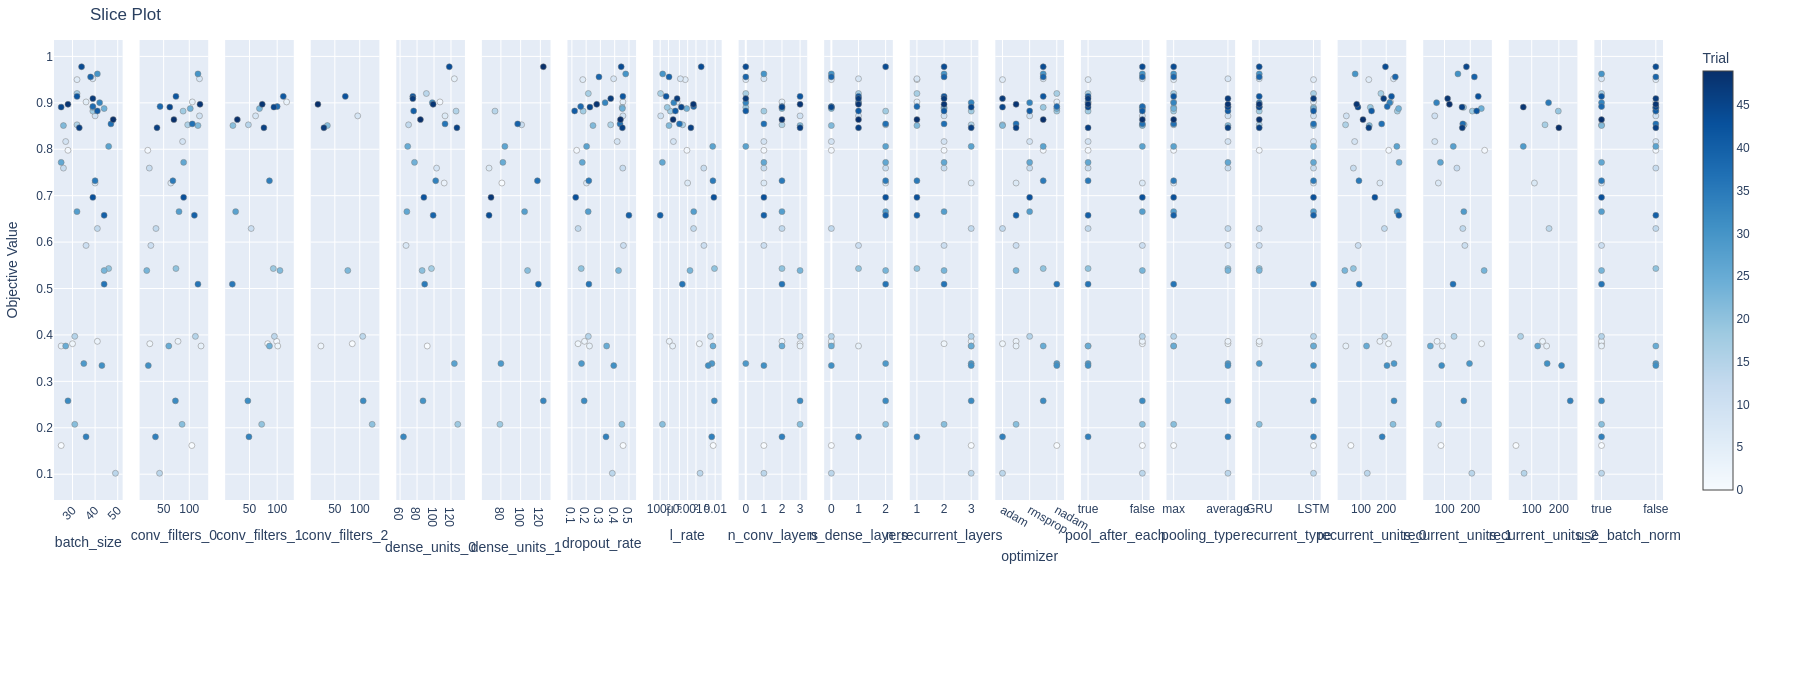

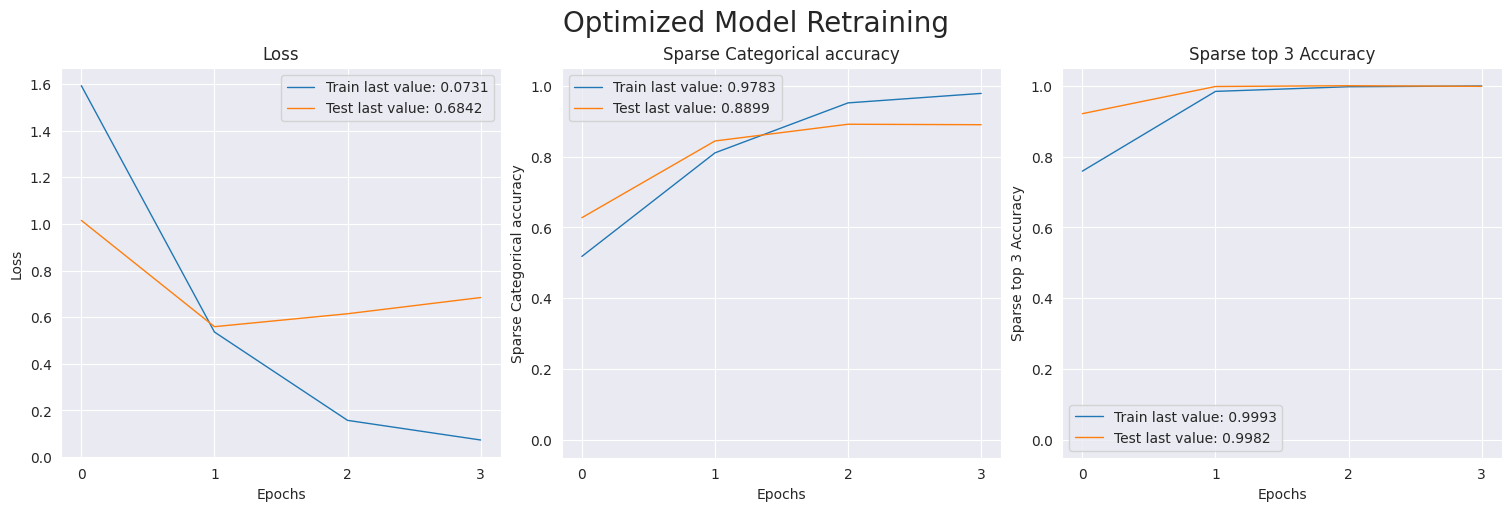

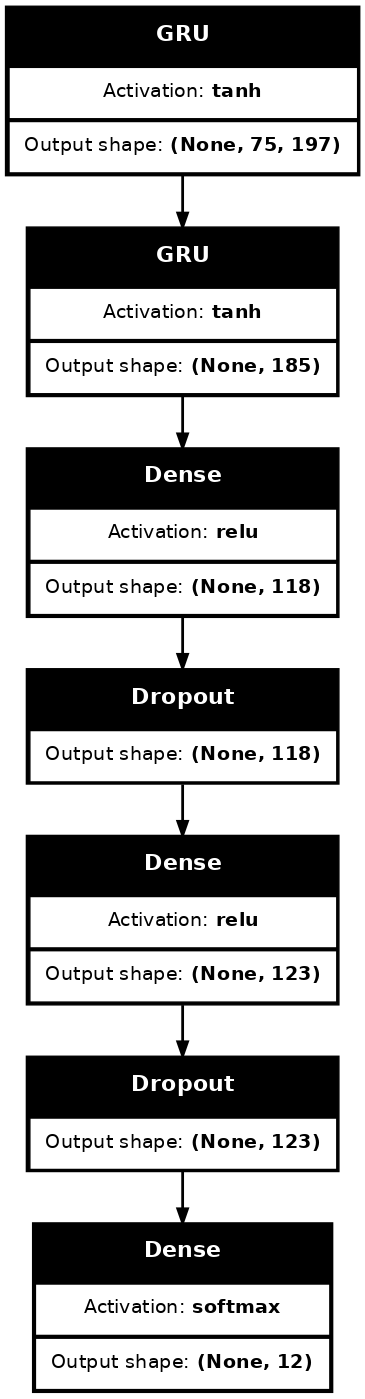

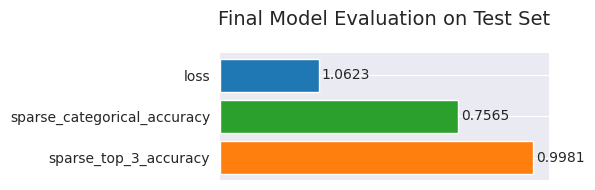

<ActivityRecognitionModel name=activity_recognition_model_151, built=True>

In [5]:
perform_study_show_graphs(
    hyperparameter_set=hyperparameter_set,
    n_trials=50,
    epochs=20,
    sampler=RandomSampler(),
)